<a href="https://colab.research.google.com/github/ariel07-sw/applied-data-in-econ/blob/main/Econ_5200_Assignment_2_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
normal_traffic = np.random.randint(20, 50, 980)
spike_traffic = np.random.randint(1000, 5000, 20)
latency_logs = np.concatenate([normal_traffic, spike_traffic])

In [ ]:
import numpy as np
def calculate_mad(latency_logs):
    median = np.median(latency_logs)
    deviations = np.abs(latency_logs - median)
    mad = np.median(deviations)
    return mad,deviations

In [ ]:
mad_value, deviations = calculate_mad(latency_logs)
print("MAD:", mad_value)
print("Deviations sample:", deviations[:10])

MAD: 8.0
Deviations sample: [ 2.  8. 15. 10. 13. 10.  7.  2.  3. 12.]


In [ ]:
sd_value = np.std(latency_logs)
print("Standard Deviation:", sd_value)

Standard Deviation: 449.3465709572067


The Standard Deviation (SD) is highly sensitive to outliers because it is based on the mean and squares deviations. The 20 extreme latency spikes dramatically increase the mean and contribute disproportionately large squared errors, causing the SD to “explode.”

In contrast, the MAD is based on the median and absolute deviations. Since the median is robust to extreme values and more than 50% of the data consists of normal observations, the MAD remains largely unaffected by the 20 outliers. Therefore, MAD provides a stable measure of dispersion in skewed distributions.

In [ ]:
def bayesian_audit(prior, sensitivity, specificity):
    """
    Return P(Cheater | Flagged) using Bayes' Rule.

    prior: P(Cheater)
    sensitivity: P(Flagged | Cheater)
    specificity: P(Not Flagged | Not Cheater)
    """
    p_cheater = prior
    p_not = 1 - prior

    p_flag_given_cheater = sensitivity
    p_flag_given_not = 1 - specificity

    p_flag = p_flag_given_cheater * p_cheater + p_flag_given_not * p_not
    posterior = (p_flag_given_cheater * p_cheater) / p_flag
    return posterior


# Given by prompt
sensitivity = 0.98
specificity = 0.98

scenarios = {
    "Scenario A (Bootcamp) prior=50%": 0.50,
    "Scenario B (Econ Class) prior=5%": 0.05,
    "Scenario C (Honors Seminar) prior=0.1%": 0.001
}

for name, prior in scenarios.items():
    post = bayesian_audit(prior, sensitivity, specificity)
    print(f"{name} -> P(Cheater | Flagged) = {post:.4f} ({post*100:.2f}%)")


Scenario A (Bootcamp) prior=50% -> P(Cheater | Flagged) = 0.9800 (98.00%)
Scenario B (Econ Class) prior=5% -> P(Cheater | Flagged) = 0.7206 (72.06%)
Scenario C (Honors Seminar) prior=0.1% -> P(Cheater | Flagged) = 0.0468 (4.68%)


In [ ]:
import numpy as np

observed = np.array([50250, 49750])
expected = np.array([50000, 50000])

In [ ]:
chi_square = np.sum((observed - expected)**2 / expected)

print("Chi-Square statistic:", chi_square)

Chi-Square statistic: 2.5


In [ ]:
if chi_square > 3.84:
    print("Experiment INVALID (SRM detected)")
else:
    print("Experiment OK (No SRM)")

Experiment OK (No SRM)


=== Survivorship Bias Check ===
Total tokens (df_all): 10,000
Survivors (top 1%):   100
Top 1% cutoff:        $9,134,108.54

Mean Peak Market Cap (ALL):       $1,936,723.29
Mean Peak Market Cap (SURVIVORS): $16,549,004.95

Bias factor (Survivors / All): 8.54


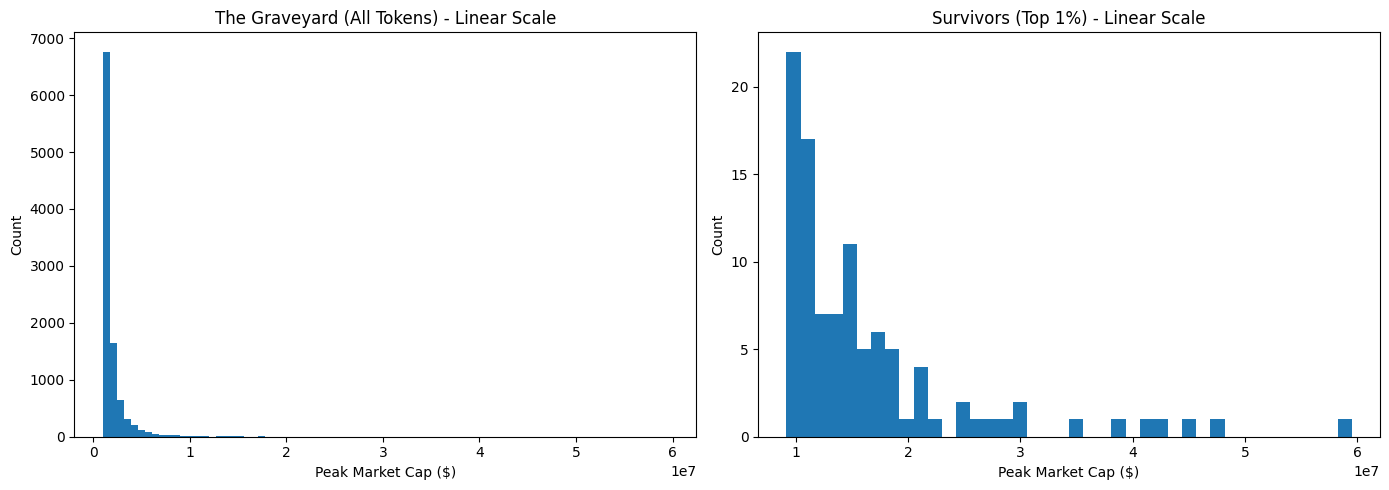

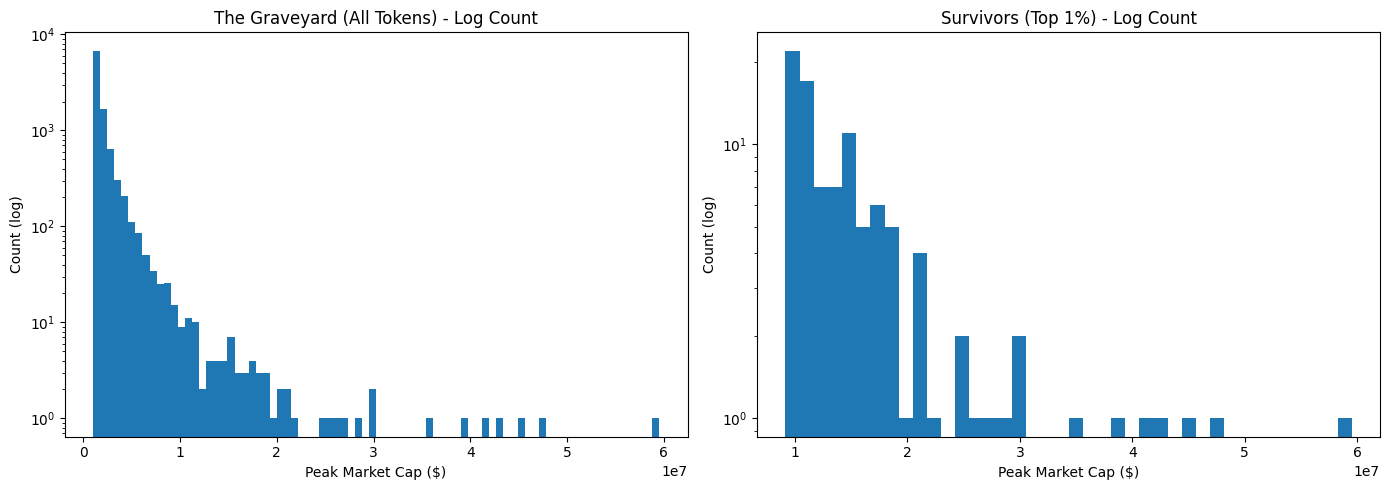

In [ ]:
# Survivorship Bias Simulation: Crypto Token Launches
# Role: Financial Data Scientist
# Goal: Show how "survivors" (top 1%) distort average outcomes.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1) Simulate 10,000 launches
# -----------------------------
np.random.seed(42)
n = 10_000

# Pareto (power-law): heavy tail where most tokens are tiny, few are huge
# shape (alpha): larger -> less extreme tail; smaller -> more extreme tail
alpha = 2.0

# Pareto returns values in (1, inf) with a heavy tail
raw = np.random.pareto(alpha, size=n) + 1

# Scale to "market cap" dollars (peak)
# Using a small scale makes most near small numbers, few large
scale = 1_000_000  # $1M baseline scale (tune if you want bigger/smaller numbers)
peak_mcap = raw * scale

# Optional: make the bottom even more "near zero" by capping tiny tokens
# (Not required, but sometimes makes the visual story clearer)
# peak_mcap = np.clip(peak_mcap, 0, None)

# -----------------------------
# 2) Create df_all and df_survivors (top 1%)
# -----------------------------
df_all = pd.DataFrame({
    "token_id": np.arange(1, n + 1),
    "peak_market_cap": peak_mcap
})

cutoff = df_all["peak_market_cap"].quantile(0.99)  # top 1% threshold
df_survivors = df_all[df_all["peak_market_cap"] >= cutoff].copy()

# -----------------------------
# 3) Evaluate: Mean Market Cap
# -----------------------------
mean_all = df_all["peak_market_cap"].mean()
mean_survivors = df_survivors["peak_market_cap"].mean()

print("=== Survivorship Bias Check ===")
print(f"Total tokens (df_all): {len(df_all):,}")
print(f"Survivors (top 1%):   {len(df_survivors):,}")
print(f"Top 1% cutoff:        ${cutoff:,.2f}")
print()
print(f"Mean Peak Market Cap (ALL):       ${mean_all:,.2f}")
print(f"Mean Peak Market Cap (SURVIVORS): ${mean_survivors:,.2f}")
print()
print("Bias factor (Survivors / All):", round(mean_survivors / mean_all, 2))

# -----------------------------
# 4) Dual histograms (matplotlib)
# -----------------------------
# Because market caps are super skewed, a linear histogram will look squashed.
# We'll plot BOTH: linear-scale and log-scale to make it readable.
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Linear scale (often shows a giant spike at low values)
axes[0].hist(df_all["peak_market_cap"], bins=80)
axes[0].set_title("The Graveyard (All Tokens) - Linear Scale")
axes[0].set_xlabel("Peak Market Cap ($)")
axes[0].set_ylabel("Count")

# Right: Survivors only (linear scale)
axes[1].hist(df_survivors["peak_market_cap"], bins=40)
axes[1].set_title("Survivors (Top 1%) - Linear Scale")
axes[1].set_xlabel("Peak Market Cap ($)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

# Optional: log-scale version (recommended)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df_all["peak_market_cap"], bins=80, log=True)
axes[0].set_title("The Graveyard (All Tokens) - Log Count")
axes[0].set_xlabel("Peak Market Cap ($)")
axes[0].set_ylabel("Count (log)")

axes[1].hist(df_survivors["peak_market_cap"], bins=40, log=True)
axes[1].set_title("Survivors (Top 1%) - Log Count")
axes[1].set_xlabel("Peak Market Cap ($)")
axes[1].set_ylabel("Count (log)")

plt.tight_layout()
plt.show()
